## Project Stage - IV (Dashboard)

## Goals

The final stage aims a developing a simple interactive dashboard based on the analysis you have done so far. In this we will be utilizing Plotly (https://plotly.com/) along with Dash (https://plotly.com/dash/) as our framework. 

Getting started with Dash: https://www.youtube.com/watch?v=hSPmj7mK6ng

*PS: This can be invoked from Jupyter, see here: https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e*

### Tasks:

#### Task 1: (100 pts)
- Member:
    - Dashboard
        - **M1.1** Shows comparisions between a variable and Normalized Mortality rate in a scatter plot
            -- Incorporate your best model prediction trend line - Linear / Non-Linear. (20 pts)
            
        - **M1.2** Contains a data table (20 pts)
        - **M1.3** Contains a map displaying values of either variables (20 pts)
        - **M1.4** Selectors (30 pts)
            - Allows for linear or log mode selection on both the variables for scatter plot. 
            - Allows for selection of state.
            - Allows for linear or log mode selection on both the variables. 
            - Allows for selection of which variable to display on the map.
        
        - **M1.4** Selection of on the graph or Data Table highlights the other ones. (10 pts)
     
***Extra Credit:*** Creative elements with the provided data and good design. Can earn upto 50 pts extra.

**Deliverable**
- Take screenshots of Report upload on canvas.
- Each member creates separate notebooks for member tasks. Upload all notebooks to Github Repository. 
- Final Presentation recordings on canvas.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px  
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output 
from datetime import date
from dash import Dash, dash_table
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from dash import Dash, dash_table, dcc, html, Input, Output, callback
import pandas as pd
import dash_bootstrap_components as dbc

In [2]:
superdf=pd.read_csv('../data/finaldf-raveena.csv')
# dropping few of the unnecessary columns from the super dataframe
superdf["Norm_Deaths"] = round(superdf["Norm_Deaths"]) #rounding the normalised deaths
superdf=superdf.drop(columns=['State_y'])
superdf=superdf.rename(columns={"State_x":"State"})

#replacing all infinity values with nan
superdf.replace([np.inf, -np.inf], np.nan, inplace=True)

#filling all nan values with 0
superdf=superdf.fillna(0.0)
superdf.head()

,Unnamed: 0,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State,...,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,FIPS,Opiod_Dispensing_Rate
0,0,"Abbeville County, SC",45001,535389,38,7.0,45.0,1.0,45001.0,SC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45001.0,32.4
1,1,"Acadia Parish, LA",22001,1279727,98,8.0,22.0,1.0,22001.0,LA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22001.0,32.2
2,2,"Accomack County, VA",51001,726189,50,7.0,51.0,1.0,51001.0,VA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51001.0,19.4
3,3,"Ada County, ID",16001,8083452,692,9.0,16.0,1.0,16001.0,ID,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16001.0,60.8
4,4,"Adair County, KY",21001,387950,43,11.0,21.0,1.0,21001.0,KY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21001.0,71.3


* We then normalise the selected 5 variables by population per 100,000.

In [3]:
superdf["Norm_disp"] = (superdf["Opiod_Dispensing_Rate"]/superdf["Population"])*100000
superdf['Norm_disp']=superdf['Norm_disp'].fillna(0.0)


superdf["Norm_Drinking"] = (superdf["Excessive drinking raw value"]/superdf["Population"])*100000
superdf["Norm_Drinking"]=superdf["Norm_Drinking"].fillna(0.0)

superdf["Norm_sexual"] = (superdf["Sexually transmitted infections raw value"]/superdf["Population"])*100000
superdf["Norm_sexual"]=superdf["Norm_sexual"].fillna(0.0)

superdf["Norm_hospital"] = (superdf["Preventable hospital stays raw value"]/superdf["Population"])*100000
superdf["Norm_hospital"]=superdf["Norm_hospital"].fillna(0.0)

superdf["Norm_mental"] = (superdf["Mental health providers raw value"]/superdf["Population"])*100000
superdf["Norm_mental"]=superdf["Norm_mental"].fillna(0.0)


superdf["Norm_premature"] = (superdf["Premature death raw value"]/superdf["Population"])*100000
superdf["Norm_premature"]=superdf["Norm_premature"].fillna(0.0)


superdf.head()

,Unnamed: 0,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State,...,Total female population raw value,Population growth raw value,FIPS,Opiod_Dispensing_Rate,Norm_disp,Norm_Drinking,Norm_sexual,Norm_hospital,Norm_mental,Norm_premature
0,0,"Abbeville County, SC",45001,535389,38,7.0,45.0,1.0,45001.0,SC,...,0.0,0.0,45001.0,32.4,6.051675,0.029146,61.431968,463.401377,0.000113,1777.753848
1,1,"Acadia Parish, LA",22001,1279727,98,8.0,22.0,1.0,22001.0,LA,...,0.0,0.0,22001.0,32.2,2.516162,0.014885,44.079714,556.681230,0.000061,796.601359
2,2,"Accomack County, VA",51001,726189,50,7.0,51.0,1.0,51001.0,VA,...,0.0,0.0,51001.0,19.4,2.671481,0.020851,102.741848,653.411164,0.000131,1440.364325
3,3,"Ada County, ID",16001,8083452,692,9.0,16.0,1.0,16001.0,ID,...,0.0,0.0,16001.0,60.8,0.752154,0.002389,5.197037,29.517092,0.000034,62.193617
4,4,"Adair County, KY",21001,387950,43,11.0,21.0,1.0,21001.0,KY,...,0.0,0.0,21001.0,71.3,18.378657,0.037489,66.374533,1298.105426,0.000476,2356.179143


In [4]:
#creating a list of all the variables in a list
variable_list=superdf[['Norm_Drinking','Norm_sexual','Norm_hospital','Norm_mental','Norm_premature']]

#converting all the numbers in the '5-digit FIPS code' to a 5 digit length, by appending then with a 0
superdf['5-digit FIPS Code']=superdf['5-digit FIPS Code'].astype('int').astype('str')
superdf['5-digit FIPS Code'] = superdf['5-digit FIPS Code'].apply(lambda x: '{0:0>5}'.format(x))
superdf['5-digit FIPS Code']

0       45001
1       22001
2       51001
3       16001
4       21001
        ...  
2525    06115
2526    02290
2527    04027
2528    48505
2529    48507
Name: 5-digit FIPS Code, Length: 2530, dtype: object

In [5]:
#creating a small data frame, to be displayed in the data table.
datadf=superdf[['County','5-digit FIPS Code','State','Population','Norm_Deaths','Norm_disp','Norm_Drinking','Norm_sexual','Norm_hospital','Norm_mental','Norm_premature']]

In [6]:
#package for the chloropeth map to be use the fips code across the map
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [13]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.H2("Opiod Moratlity Dashboard", style={'text-align': 'center'}),
    html.P("A simple dashboard for viewing opiod cases by state.This dashboard allows you to select the state and the category of drug mortality.We display both a graph and a map for the opioid mortality.In the graph the size of the bubble indicates the unemployment rate."),
    html.Div([
        html.Div([
            dcc.Dropdown(
                superdf['State'].unique(),
                'NC',
                id='state',
            ),
            dcc.RadioItems(
                ['Linear', 'Non-Linear'],
                'Linear',
                id='mortality_rate',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
             dcc.Dropdown(id='variable',
                 options=[{'label': s, 'value': s}
                 for s in variable_list], 
                 value='Norm_Drinking',
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='variable_rate',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'padding': '10px 5px'
    }),
    
     html.Div([
    dcc.RadioItems(
         ['Graph','Map'],
         'Graph',
         id='gm',
         labelStyle={"display":"block"},inline=True,style={'text-align': 'center'}),
     ]),
        dcc.Graph(id='graph_maingraph'),


    dcc.Markdown('### DataTable', style={'textAlign':'center'}),
    dbc.Label("Select number of rows"),
    row_drop := dcc.Dropdown(value=10, clearable=False, style={'width':'35%','display': 'inline-block'},
                             options=[10, 25, 50, 100]),

    my_table := dash_table.DataTable(
        columns=[
            {'name': i, 'id': i} for i in datadf.columns
        ],
        data=datadf.to_dict('records'),
        filter_action='native',
        editable=True, 
        page_size=10,
        style_cell={'textAlign': 'left'},
        style_data={
            'width': '150px', 'minWidth': '150px', 'maxWidth': '150px',
            'overflow': 'hidden',
            'textOverflow': 'ellipsis'
        },
         style_header={ 'backgroundColor': 'rgb(135, 185, 220)',
                       'fontWeight': 'bold',
                      'border': '1px solid black'},
    )
])
@app.callback(
     Output(component_id='graph_maingraph',component_property='figure'),
     [Input('state','value'), 
     Input('gm','value'),
     Input('mortality_rate','value'),
     Input('variable','value'),
     Input('variable_rate','value')])

def updated_graph(state,gm,mortality_rate,variable,variable_rate):
            if gm=='Graph':
               if mortality_rate=='Linear':
                    if variable_rate=='Linear':
                        df1 = superdf[superdf['State']==state]
                        fig=px.scatter(df1, x=df1['Norm_Deaths'], y=df1[variable],size="Unemployment raw value",color_continuous_scale='peach',trendline="ols",trendline_color_override="green")
                        fig.update_layout(title='Linear Regression for Normalized Mortality vs\t'+str(variable), xaxis_title="Normalised Mortality rate",
                            yaxis_title="Normalised\t"+str(variable))   
                        return fig
                    elif variable_rate=='Log':
                        df1 = superdf[superdf['State']==state]
                        fig=px.scatter(df1, x=df1['Norm_Deaths'], y=df1[variable],size="Unemployment raw value",color_continuous_scale='armyrose',log_x=True,trendline="ols",trendline_color_override="orange")
                        fig.update_layout(title='Linear-Log Regression for Normalized Mortality vs\t'+str(variable), xaxis_title="Log Normalised Mortality rate",
                            yaxis_title="Log Normalised\t"+str(variable))   
                        return fig
               elif mortality_rate=='Non-Linear':
                    if variable_rate=='Linear':
                        df1 = superdf[superdf['State']==state]
                        #[a,b,c]=polyregression(state,variable)
                        fig= px.scatter(df1, x=df1['Norm_Deaths'], y=df1[variable],size="Unemployment raw value",color_continuous_scale=' jet',trendline="lowess",trendline_color_override="red")
                        fig.update_layout(title='Non-Linear Regression for Normalized Mortality vs\t'+str(variable), xaxis_title="Normalised Mortality rate",
                            yaxis_title="Normalised\t"+str(variable)) 
                        return fig
                    elif variable_rate=='Log':
                        df1 = superdf[superdf['State']==state]
                        fig= px.scatter(df1, x=df1['Norm_Deaths'], y=df1[variable],size="Unemployment raw value",color_continuous_scale='tropic', log_x=True,trendline="lowess",trendline_color_override="black")
                        fig.update_layout(title='Non-Linear Regression for Log Normalized Mortality vs\t'+str(variable), xaxis_title="Log Normalised Mortality rate",
                            yaxis_title="Log Normalised\t"+str(variable))   
                        return fig
            elif gm=='Map':
                df1 = superdf[superdf['State']==state]
                fig1 = px.choropleth(df1, geojson=counties, locations='5-digit FIPS Code', color=df1[variable],
                    color_continuous_scale="Viridis",range_color=(0, 12),scope="usa",title='Choropleth for\t'+str(state)+str(variable))
                return fig1

@callback(
    Output(my_table, 'data'),
    Output(my_table, 'page_size'),
    Input('state', 'value'),
    Input('variable','value'),
    Input(row_drop, 'value')
)
def update_dropdown_options(state,variable, row_v):
    dff = datadf.copy()

    if state and variable:
        dff = dff[dff.State==state]
        dff=dff[['County','5-digit FIPS Code','State','Population','Norm_Deaths','Norm_disp',variable]]

    return dff.to_dict('records'), row_v


app.run_server(port=9876)

Dash app running on http://127.0.0.1:9876/


## Screenshots of all the operations across the dashboard.

* Shows comparisions between a variable(intially we set it to Normalised Drinking) and Normalized Mortality rate in a scatter plot -- Incorporate your best model prediction trend line - Linear / Non-Linear.

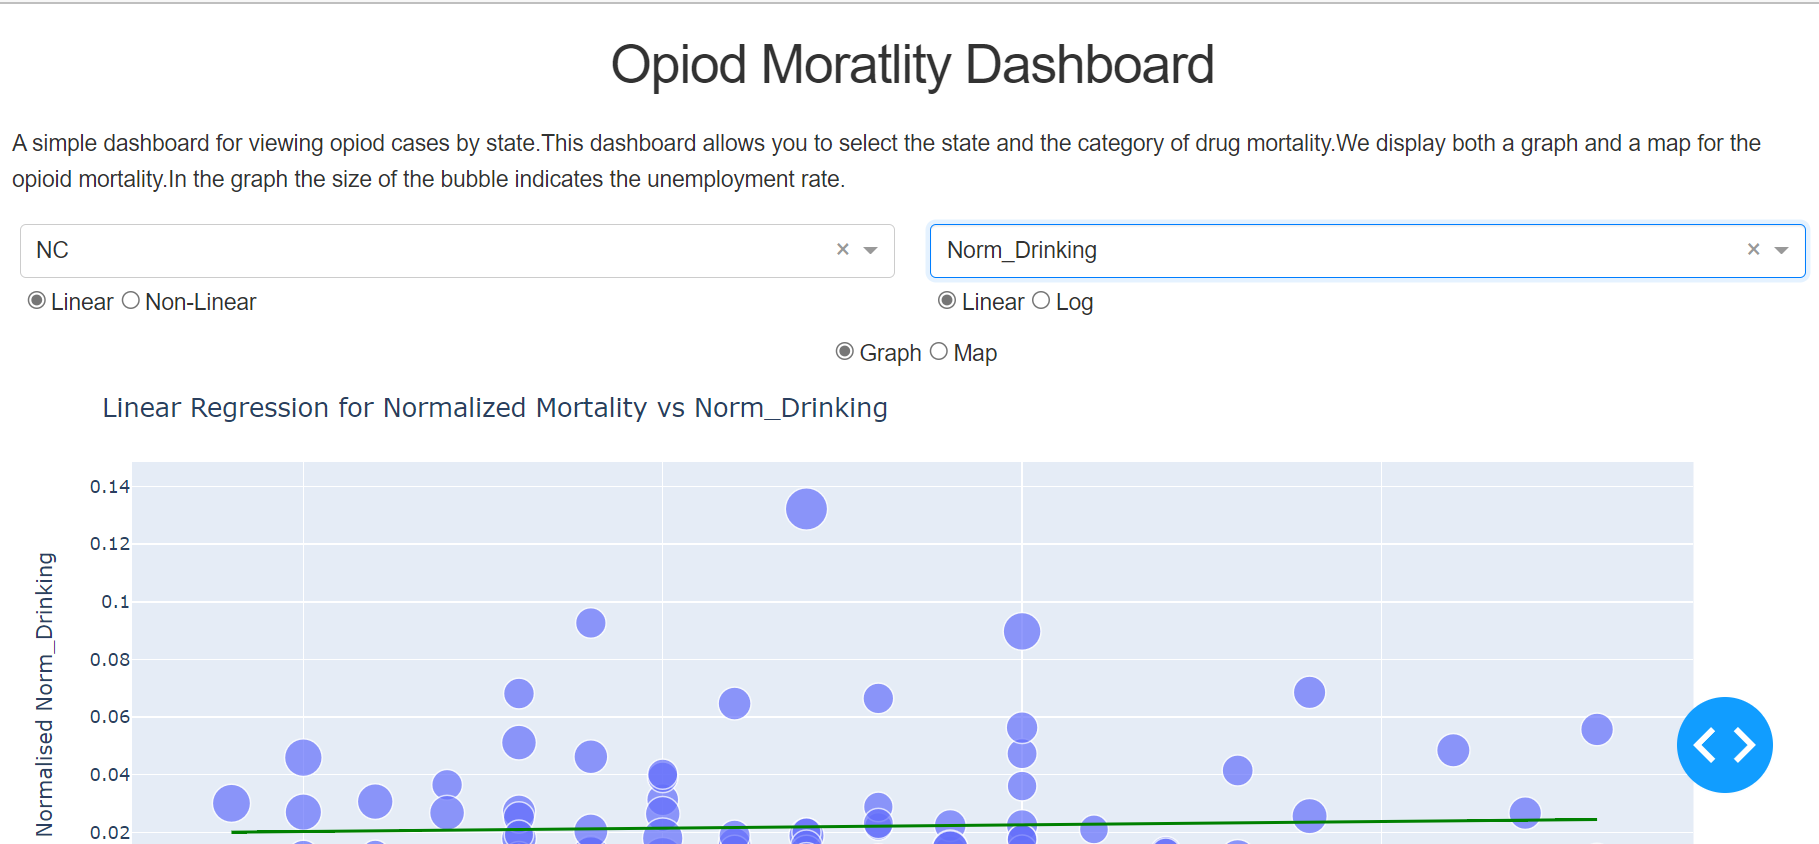


## Comparission between Linear and Log for NC state
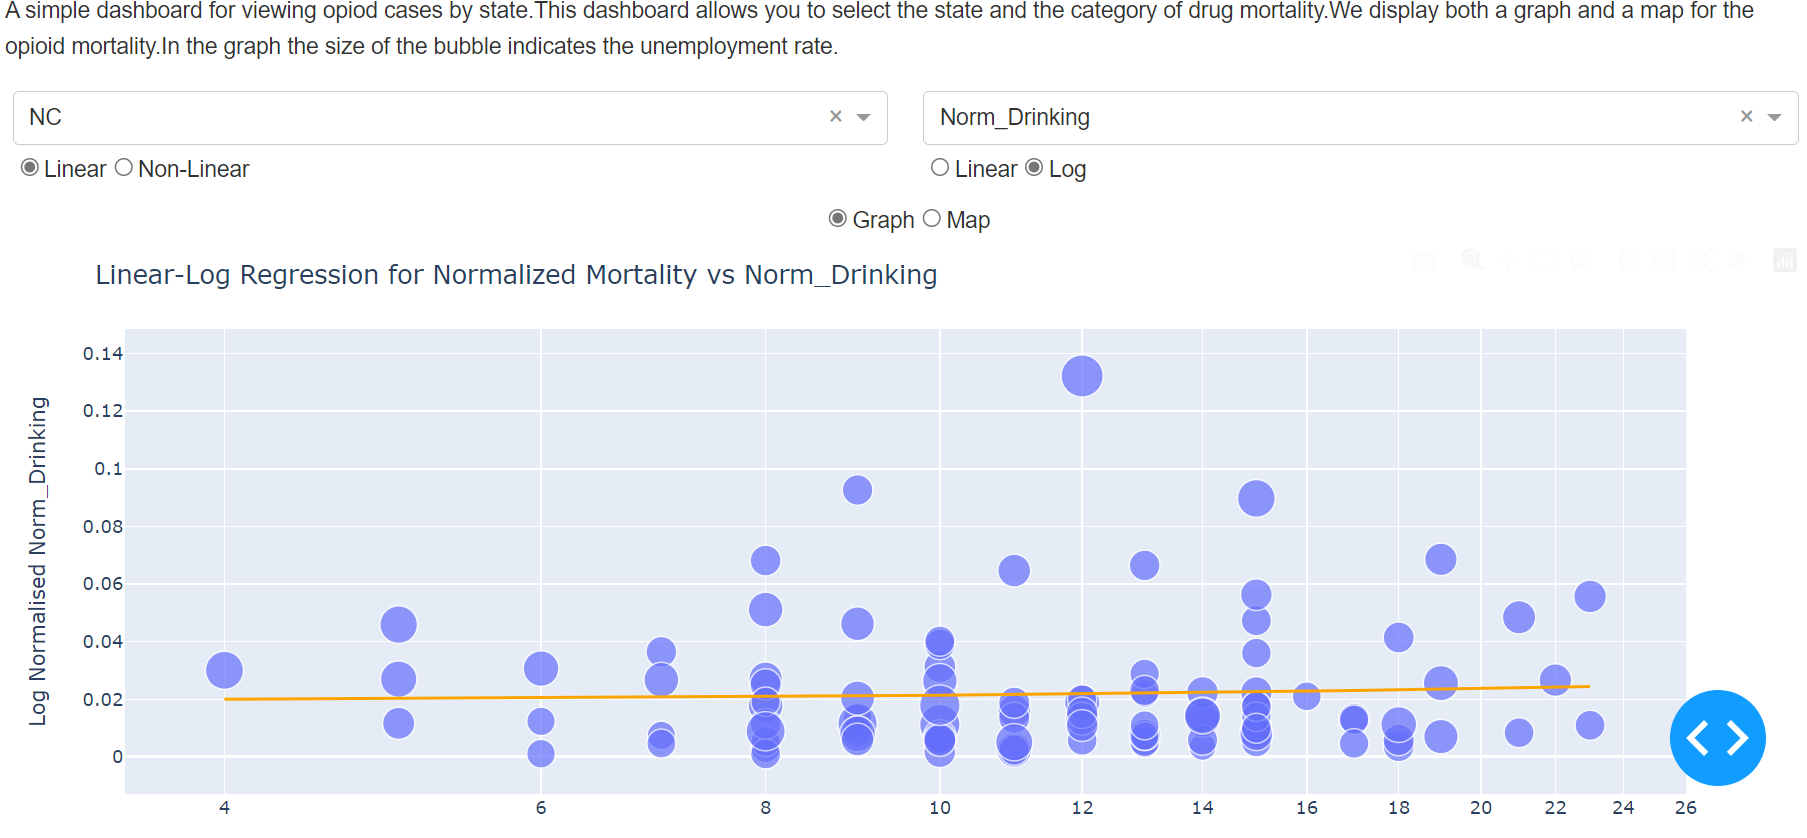

## Comparission between Non-Linear and Linear
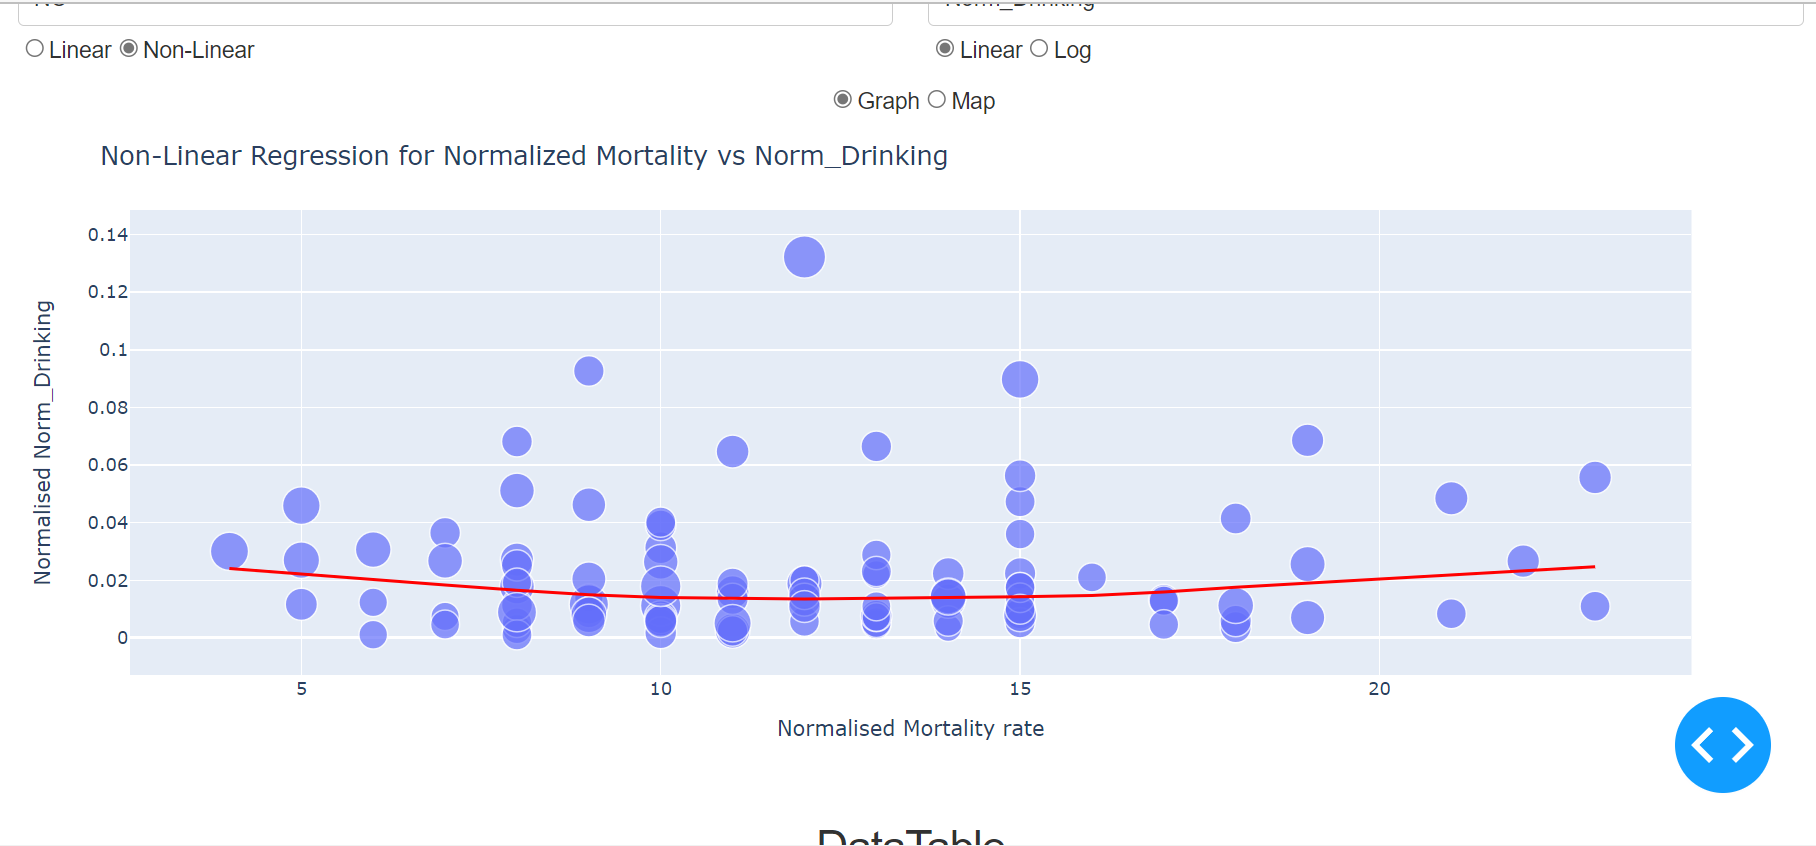

## Comparission between Non-Linear and Log
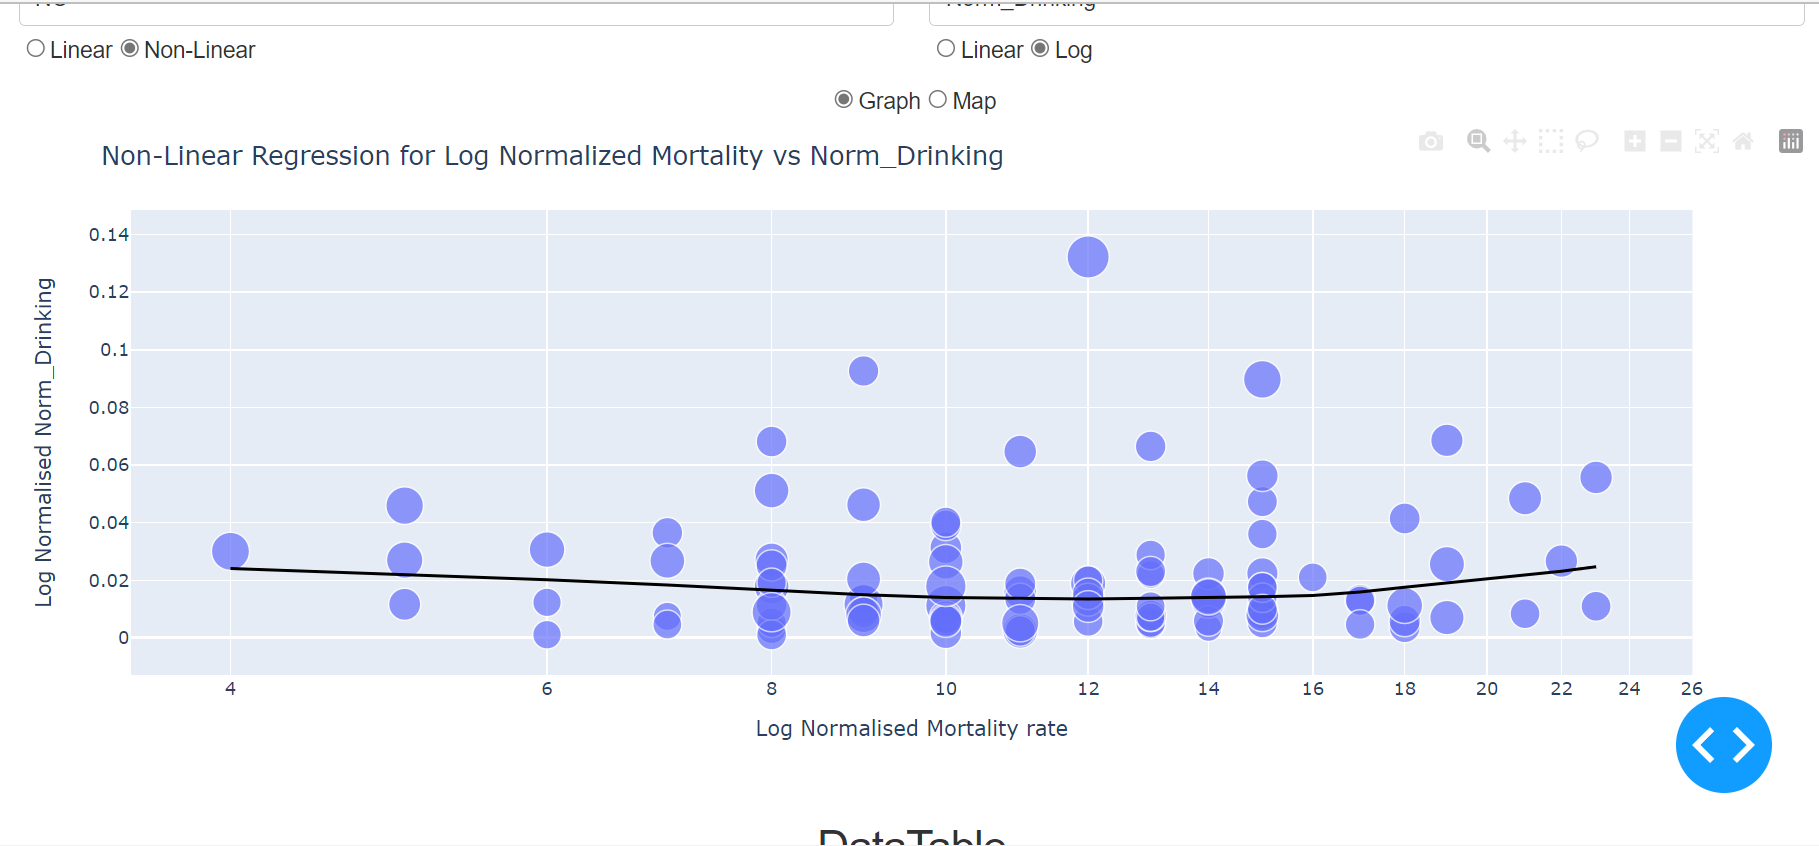

## A map which is region specific and whose values vary according to the variable selected. 

### Map showing the Normalised excessive drinking values across the NC state. 
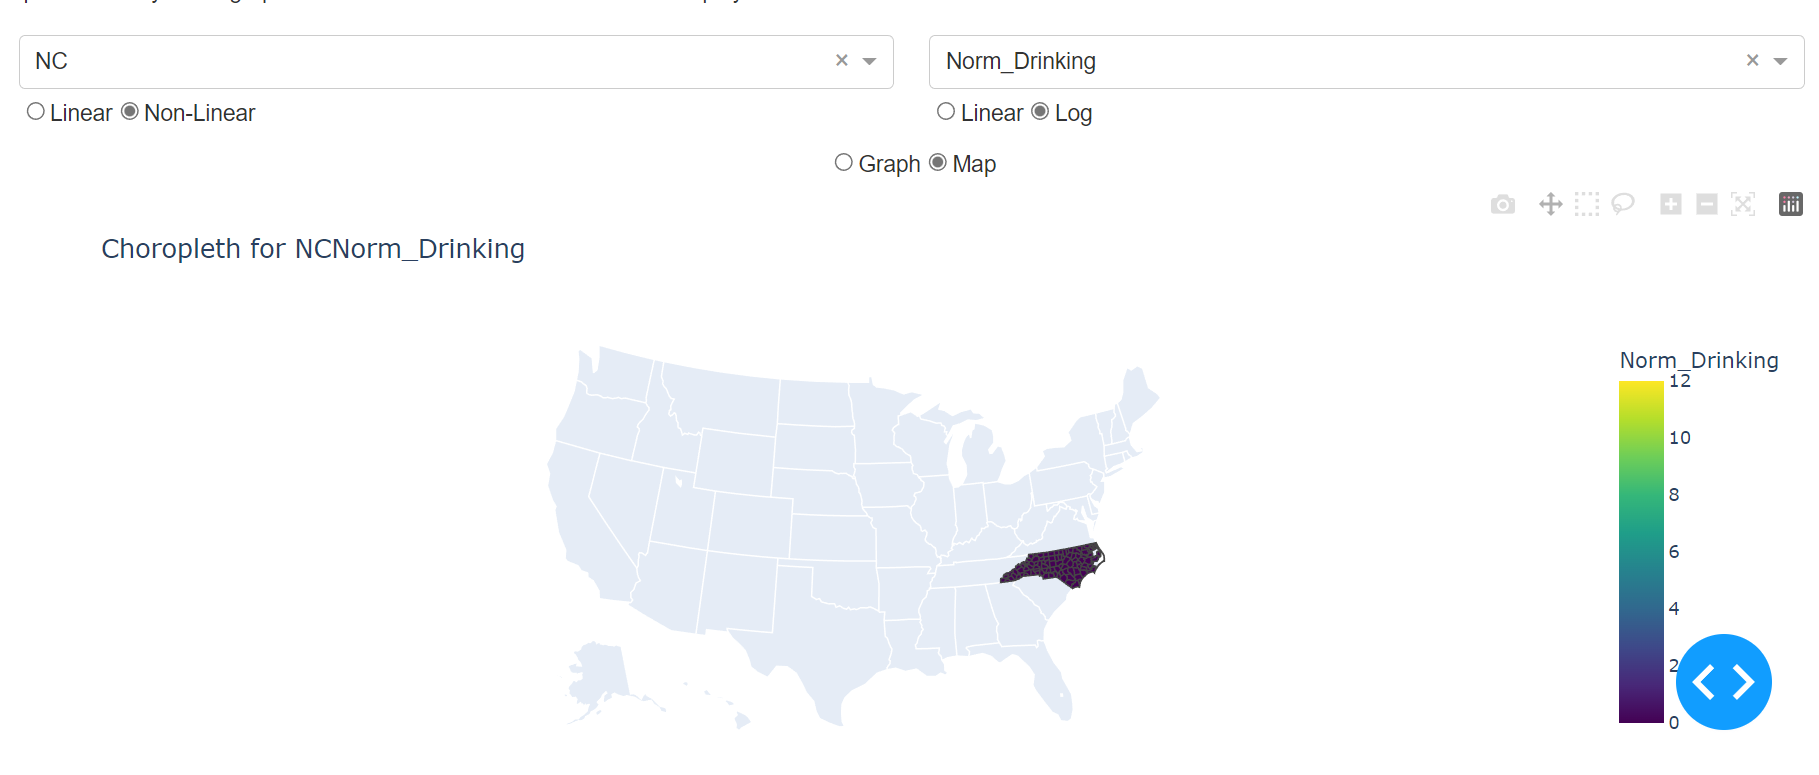

### Map showing the Normalised preventable hospital stays values across the NC state. 
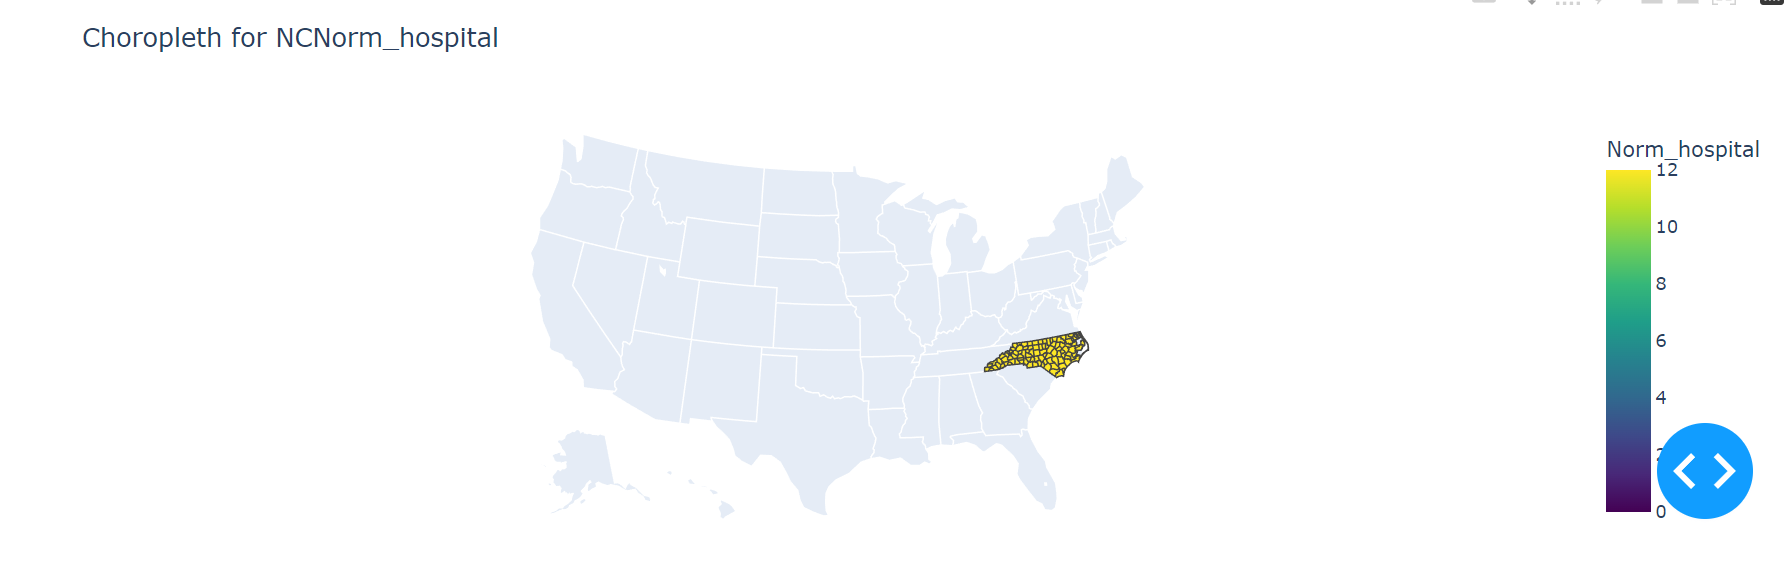

### Map showing the Normalised excessive drinking values across the WI state. 
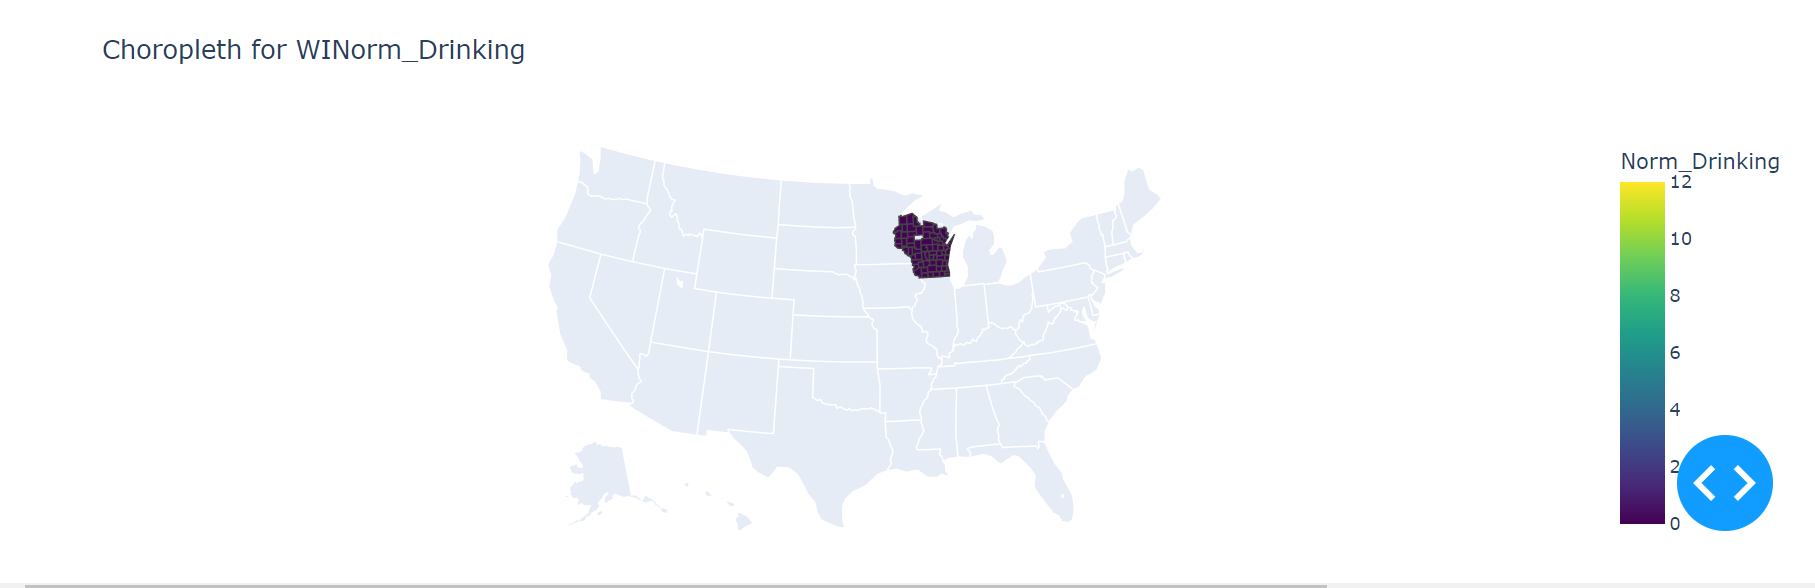

### Map showing the Normalised preventable hospital stays values across the WI state. 
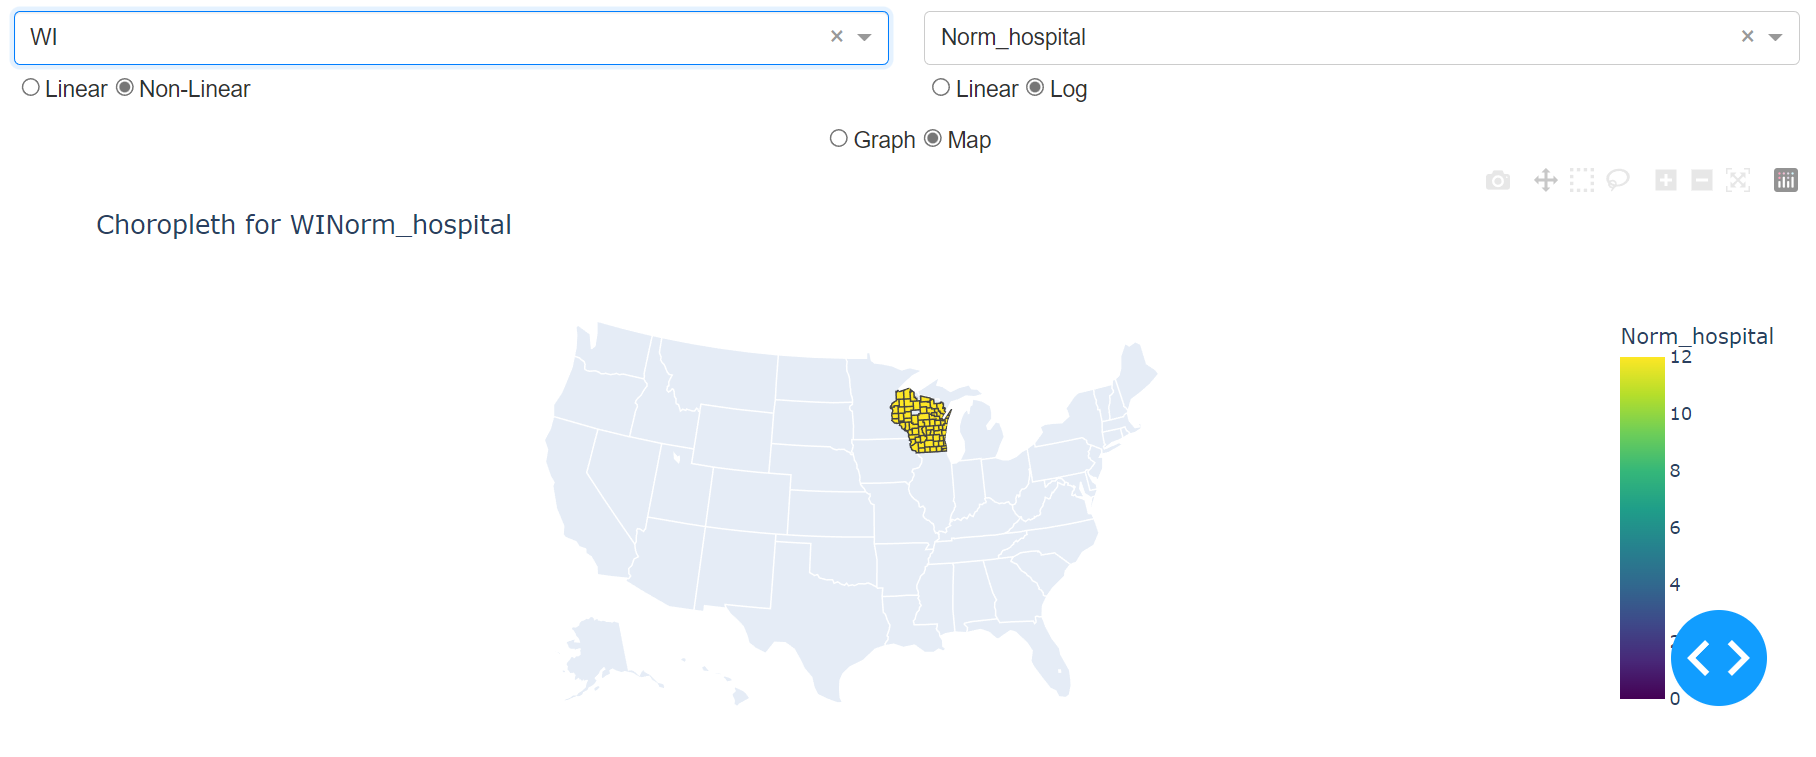

## A datatable which shows the values across the selected state and the selected variable. 

### Data table for NC state and Norm_drinking values
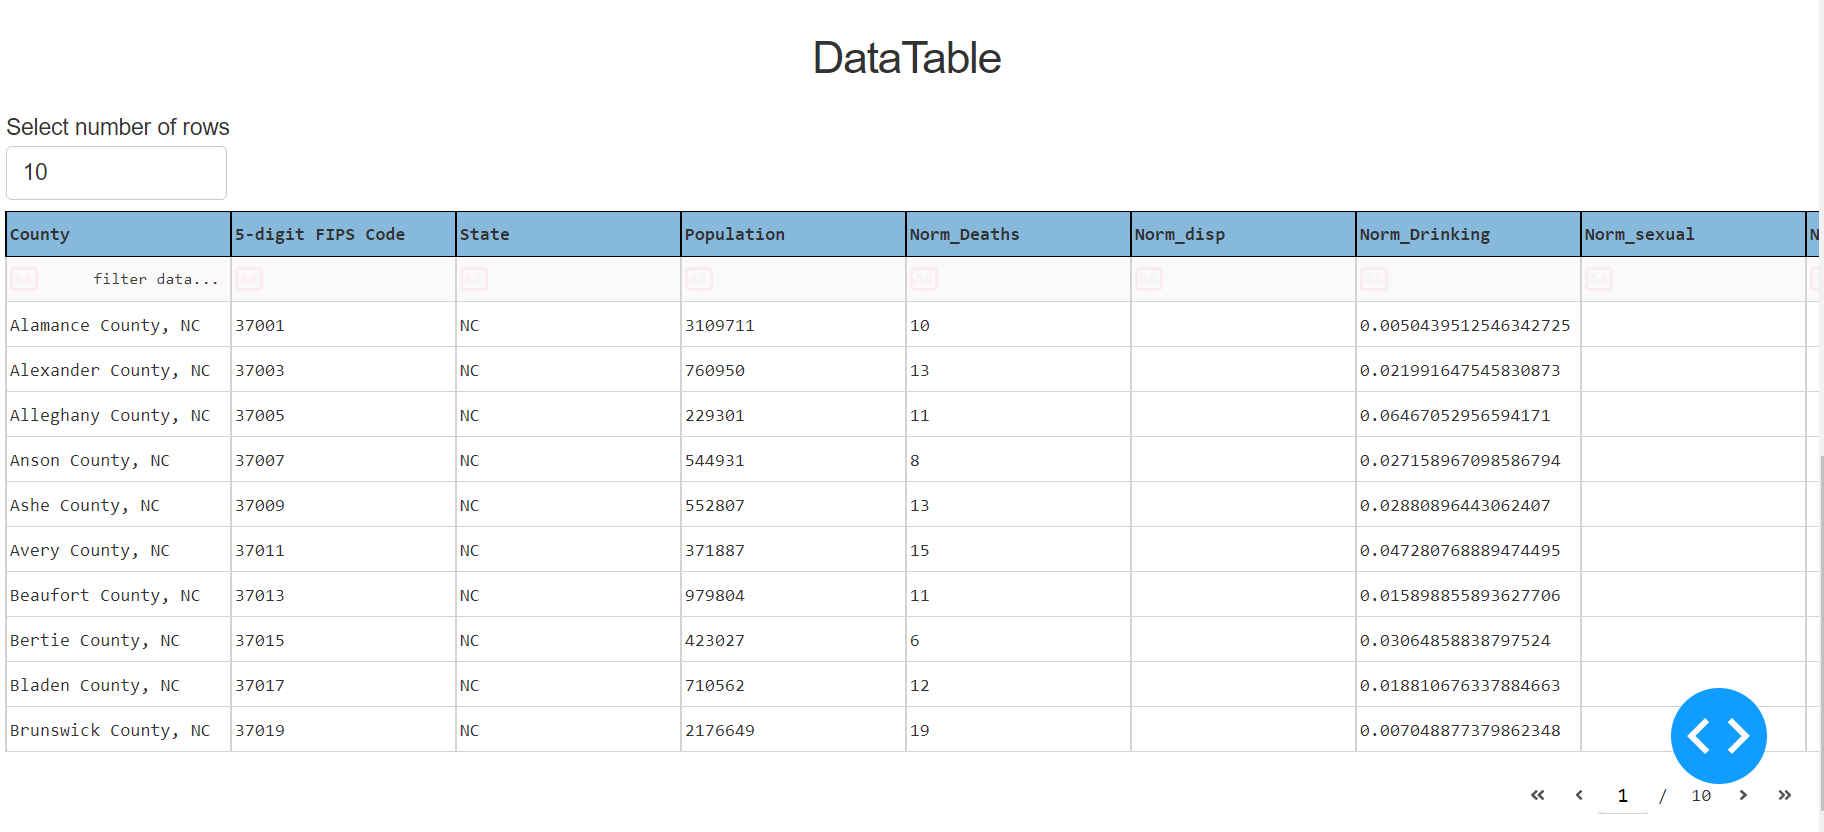

### Data table for NC state and Norm_sexual values
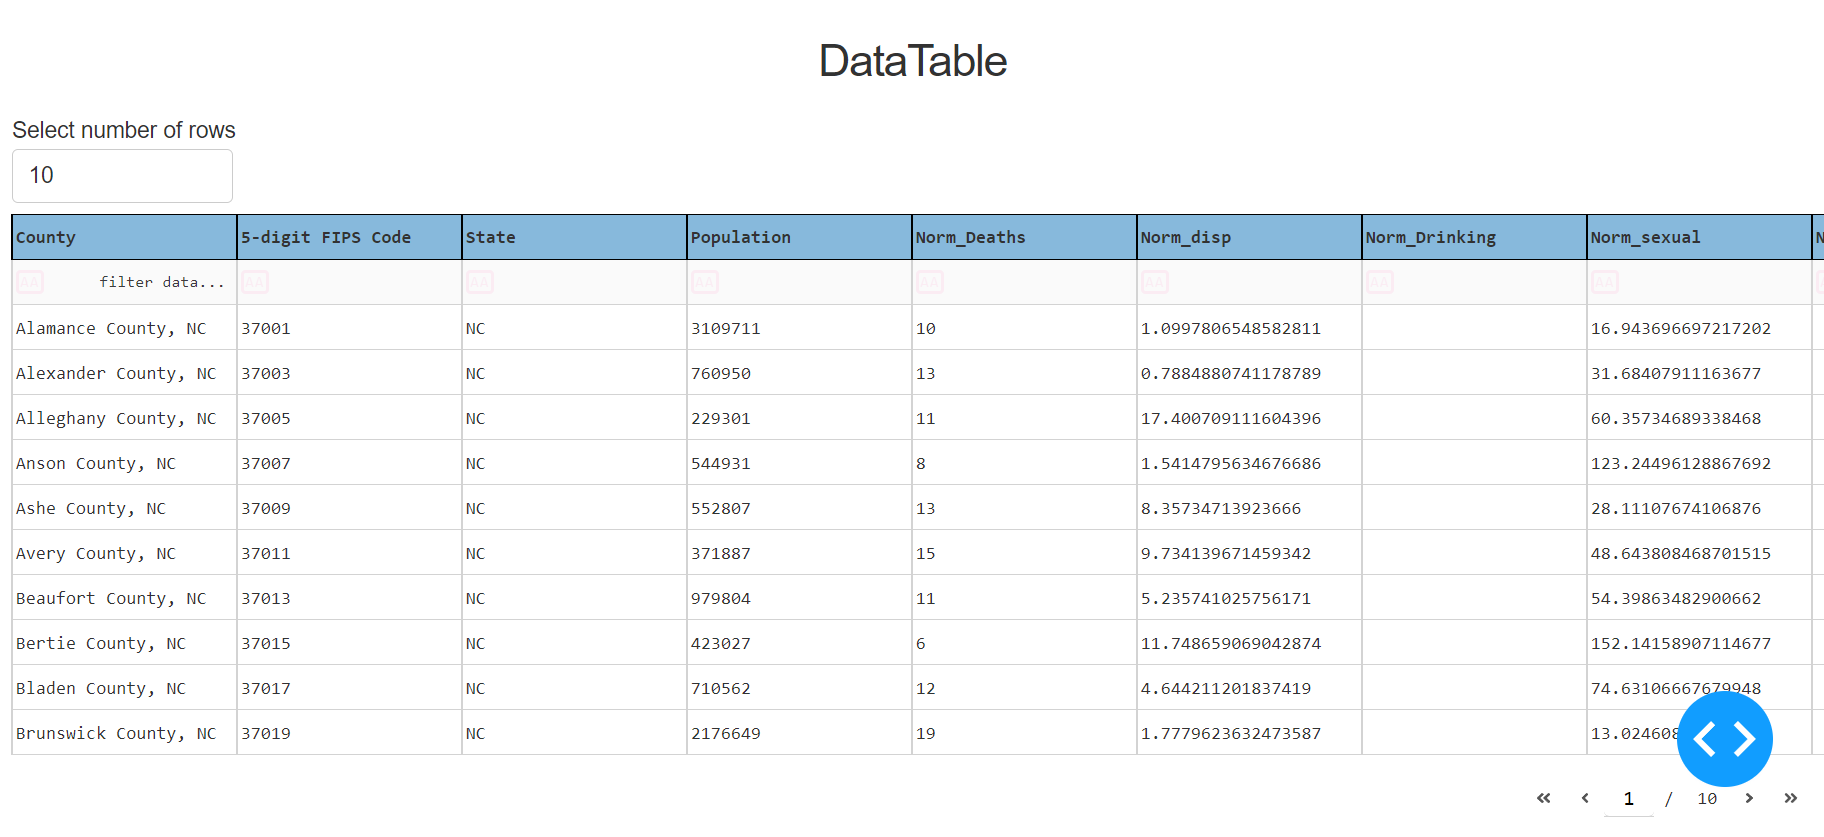

### Data table for CA state and Norm_drinking values
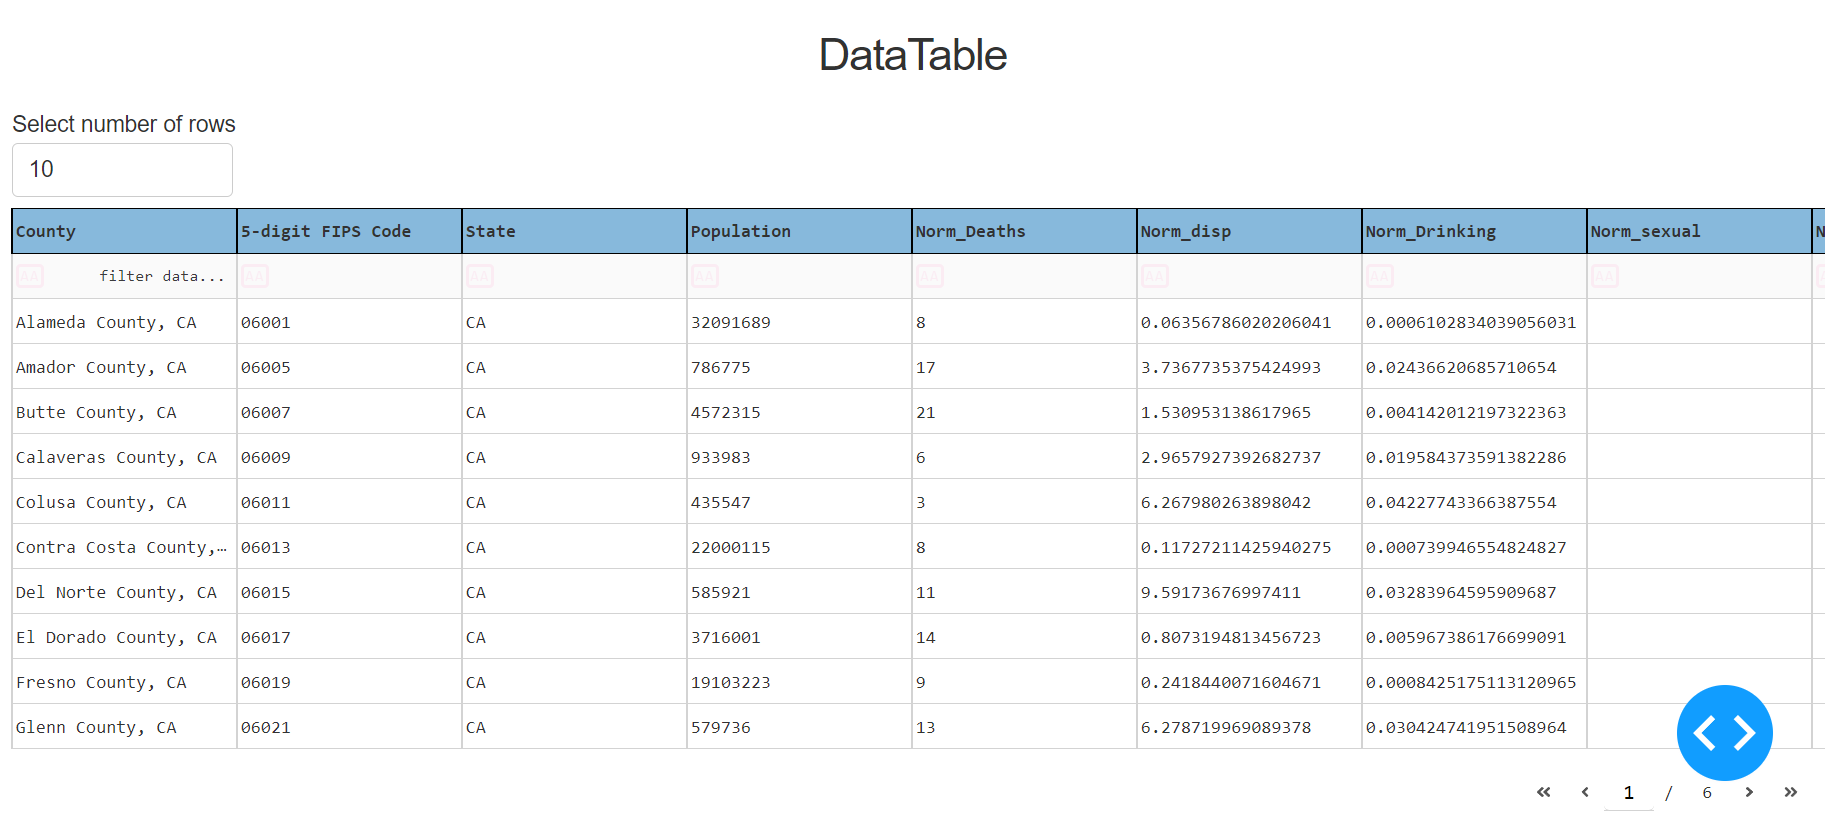

### Data table for CA state and Norm_sexual values
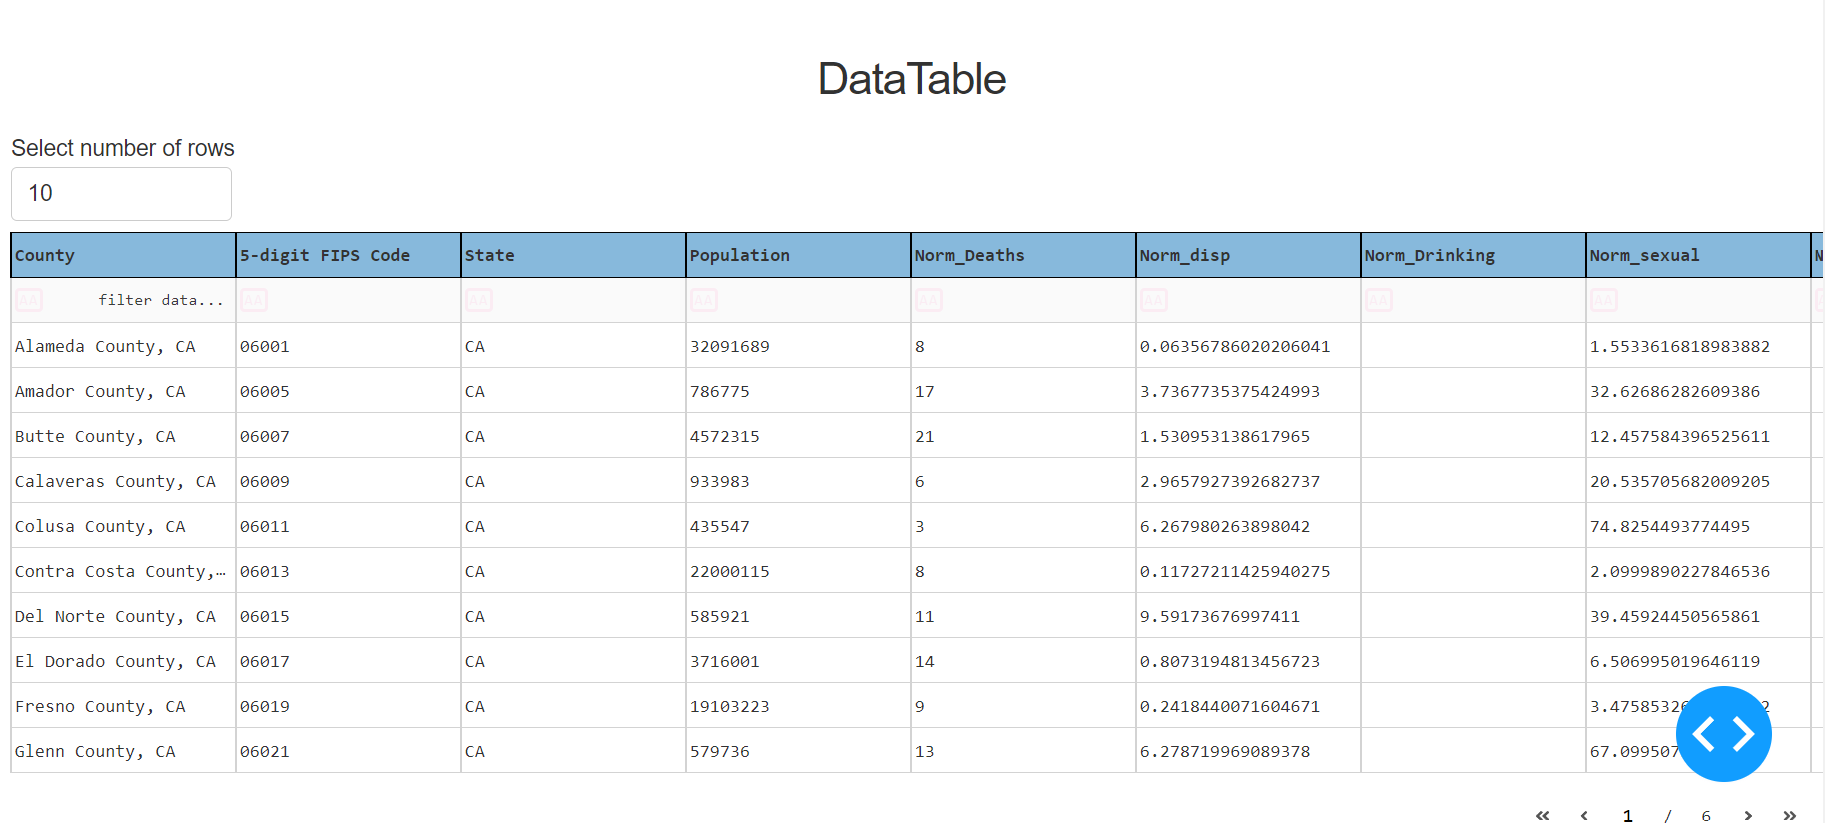

## References:

* https://dash.plotly.com/datatable/style
* https://dash.plotly.com/interactive-graphing
* https://dash.plotly.com/dash-core-components/dropdown
* https://plotly.com/python/choropleth-maps/
* https://plotly.com/python/ml-regression/
* https://plotly.com/python/linear-fits/
* https://www.youtube.com/watch?v=stgbYj1QqsA